In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20e2b5f4fc8>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [12]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [148]:
engine.execute('SELECT COUNT(*) FROM station').fetchall()

[(9,)]

In [15]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
# Use `engine.execute` to select and the MIN and MAX dates in the measurement table
engine.execute('SELECT MIN(date), MAX(date) FROM measurement').fetchall()

[('2010-01-01', '2017-08-23')]

In [83]:
engine.execute("SELECT DISTINCT(s.name) FROM station s INNER JOIN measurement m ON s.station = m.station WHERE Date(m.date) >='2016-08-23' AND Date(m.date) <='2017-08-23'").fetchall()

[('WAIKIKI 717.2, HI US',),
 ('KANEOHE 838.1, HI US',),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',),
 ('PEARL CITY, HI US',),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',),
 ('WAIHEE 837.5, HI US',),
 ('MANOA LYON ARBO 785.2, HI US',)]

In [84]:
# Use `engine.execute` to select a two week period starting April 17 to May 1 2017 measurement table
search_string = f"SELECT s.station, s.name, s.latitude, s.longitude, m.date, m.prcp, m.tobs FROM station s INNER JOIN measurement m ON s.station = m.station WHERE Date(date) >='2017-04-17' AND Date(date) <='2017-05-01' and s.name LIKE 'KANEOHE%'"
engine.execute(search_string).fetchall()

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-17', 0.41, 69.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-18', 0.08, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-19', 0.02, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-20', 0.33, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-21', 1.16, 70.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-22', 1.01, 74.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-23', 0.02, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-24', 0.0, 76.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-25', 0.0, 75.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-26', 0.0, 78.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, '2017-04-27', 0.1, 73.0),
 ('USC00513117', 'KANEOHE 838.1, HI 

In [130]:
last12months_search_string = f"SELECT m.date, m.prcp FROM station s INNER JOIN measurement m ON s.station = m.station  WHERE Date(m.date) >='2016-08-23' AND Date(m.date) <='2017-08-23' and s.name LIKE 'KANEOHE%'"
twelve_month_pcp_raw = pd.DataFrame(engine.execute(last12months_search_string).fetchall())
twelve_month_pcp_renamed = twelve_month_pcp_raw.rename(columns={0:"Date", 1:"Prcp"})
twelve_month_pcp_renamed.set_index("Date")
twelve_month_pcp = pd.DataFrame(twelve_month_pcp_renamed)
twelve_month_pcp

,Date,Prcp
0,2016-08-23,0.15
1,2016-08-24,2.15
2,2016-08-25,0.08
3,2016-08-26,0.03
4,2016-08-27,0.18
...,...,...
338,2017-07-27,0.00
339,2017-07-28,0.13
340,2017-07-29,0.06
341,2017-07-30,0.00


In [110]:
calendar_dt = []

for dt in twelve_month_pcp['Date']:
    calendar_dt.append(dt)
    
    
prcp_list = []
for prec in twelve_month_pcp['Prcp']:
    prcp_list.append(prec)
    

In [111]:
# Set x axis and tick locations
x_axis = np.arange(len(calendar_dt))
tick_locations = [value+0.4 for value in x_axis]

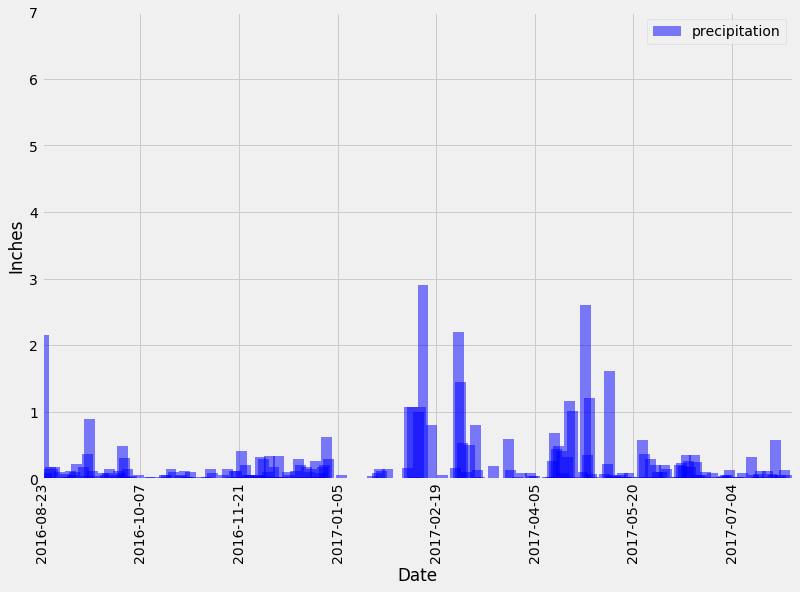

In [146]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = calendar_dt
y_axis = prcp_list

plt.figure(figsize=(12,8))
plt.bar(x_axis, y_axis,width=5, color='blue',alpha=0.5, align="center", label='precipitation')
ticks = np.arange(0,450,45)
plt.xticks(ticks, rotation=90)
plt.xlim("2016-08-23","2017-08-23")
plt.ylim(0,7)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid(which='major', axis='both', linestyle='-')
plt.legend()
plt.savefig("Images/precipitation1.png")
plt.show()

In [147]:
# Use Pandas to calculate the summary statistics for the precipitation data
twelve_month_pcp.describe()

,Prcp
count,343.000000
mean,0.141429
std,0.341245
min,0.000000
25%,0.000000
50%,0.030000
75%,0.120000
max,2.900000


In [150]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT COUNT(*) FROM station').fetchall()

[(9,)]

In [163]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts_string = "SELECT station, count(*) FROM measurement GROUP BY station ORDER BY 2 DESC"
engine.execute(station_counts_string).fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [168]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_string = " SELECT m.station, MIN(m.tobs), MAX(m.tobs), AVG(m.tobs) \
FROM measurement m INNER JOIN (SELECT station, count(*) FROM measurement GROUP BY station \
ORDER BY 2 DESC LIMIT 1 ) t ON m.station = t.station"
engine.execute(most_active_station_string).fetchall()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [207]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_details = engine.execute(most_active_station_string).fetchall()
top_station = top_station_details[0][0]
query_string = f"SELECT tobs FROM measurement WHERE station ={top_station} AND Date(date) >='2016-08-23'"
temperature_df = pd.DataFrame(engine.execute(f"SELECT tobs, COUNT(*) FROM measurement WHERE station ='{top_station}' AND Date(date) >='2016-08-23' GROUP BY tobs").fetchall())
temp_df = pd.DataFrame(temperature_df.rename(columns={0:"tobs", 1:"Frequency"}))

temp_list = temp_df['tobs'].to_list()
freq_list = temp_df['Frequency'].to_list()

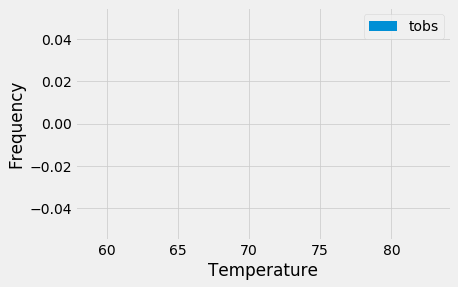

In [203]:
plt.hist(freq_list, bins=temp_list,rwidth=1.0,label='tobs')
plt.grid(axis='both', alpha=0.75)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.savefig("Images/histogram2.png")
plt.legend()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
